## In Jupyter Notebook run first

In [393]:
%reload_ext autoreload
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/API
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/global_vars_and_constants
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/functions
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/imports

Ready to go !


# Main

In [403]:
%matplotlib widget
df_sec = update_securities_df(Securities_file_import_from_csv)
# Relative strength indicator and economic indicators

# df = update_securities_df(Securities_file_import_from_csv)

# Local variables
#accounts = ['sectors','inx']
data_type='Adj Close'
# force_update = False # Force download of financial data
# df = df.loc[(df['Type'] == 'sector') | (df['Type'] == 'inx')]
# df = df['Ticker'].values.tolist()

# for ARRAY in df: 
#     prices_file = META_FILE_FOLDER_LOCATION +'prices_'+ARRAY+'.csv'
# #     if ARRAY == 'sectors': 
# #         securities = ['xlp', 'xle', 'xlv', 'xli', 'xlb',
# #                       'xlk', 'iyt', 'xlu', 'vcr', 'vfh', 'vnq']
        
#         sector_price_data = get_prices(df, account, prices_file, 
#                                        data_type, start_date, force_update)
        
#     for index,rows in df.iterrows():
#         if rows['Type'] == 'sector':
#             prices_file = META_FILE_FOLDER_LOCATION +'prices_'+rows['Ticker']+'.csv'
#             sector_price_data = get_prices(rows['Ticker'], account, prices_file, 
#                                            data_type, start_date, force_update)
        

df = df_sec
df = df.loc[(df['Type'] == 'sector') | (df['Type'] == 'inx')]
df = df['Ticker'].values.tolist()
        
sector_price_data = get_prices(df, account, META_FILE_FOLDER_LOCATION, 
                                data_type, start_date, force_update = False)


inx_price_data = sector_price_data[[INX]]
#inx_price_data = inx_price_data.rename(columns={inx_price_data[0]: INX })
inx_price_data['MA50_index']=inx_price_data[INX].rolling(50).mean()
inx_price_data['MA200_index']=inx_price_data[INX].rolling(200).mean()
#inx_price_data.index = pd.to_datetime(inx_price_data.index)

#  Function calls
Market_indicator_signal,mkt_ind = get_mkt_indicator(inx_price_data)
Average_return = _1_3_6_9_12_month_returns(sector_price_data)
FRED_data_mort = get_FRED_data('MORTGAGE30US','mort',start_date,0,1,FRED_API)
FRED_data_LEI = get_FRED_data('USSLIND','LEI',start_date,0,1,FRED_API)
FRED_data_inf = get_FRED_data('CPILFESL','inf',start_date,12,100,FRED_API)
FRED_data_10_2 = get_FRED_data('T10Y2Y','10_2',start_date,0,1,FRED_API)
FRED_data_RF = get_FRED_data('DTB3','RF',start_date,0,1,FRED_API)
FRED_data_ICSA = get_FRED_data('ICSA','UnEmp',start_date,52,1,FRED_API)

combined_12_mo_return = pd.concat([FRED_data_RF, FRED_data_inf,
                                  FRED_data_LEI, FRED_data_mort,
                                  FRED_data_10_2, FRED_data_ICSA], 
                                  axis=1, sort=False)
combined_12_mo_return = combined_12_mo_return.fillna(method='ffill')
combined_12_mo_return = combined_12_mo_return.fillna(method='bfill')

#  Display
display = display_relative_strength(Average_return,
                                    Market_indicator_signal,
                                    mkt_ind,
                                    securities_file_location)
display2 = prepare_market_indicator(inx_price_data,INX);
display3 = bollinger_bands_graph(inx_price_data,INX);
display4 = econometric_graph(combined_12_mo_return);

Downloding financial data ....
xlp
xle
xlv
xli
xlb
xlk
iyt
xlu
vcr
vfh
vnq
tlt
spy
ivv
spxl
bnd
gld
Downloding financial data .... Finished
xlp
Today the market was open and the 
sectors price data is updated


<ipython-input-403-b61edfd8547a>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inx_price_data['MA50_index']=inx_price_data[INX].rolling(50).mean()
<ipython-input-403-b61edfd8547a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inx_price_data['MA200_index']=inx_price_data[INX].rolling(200).mean()



Last run: 2020-08-03 12:21:06.747773
The last 20 years of price data
Market analysis end timestamp : 16

The ascending mean return for 1,3,6,12mo ranking for 11 sectors are :
Ticker  Av_ret            category  Div yeild / yr  Div - exp  Expense ratio   EX_date_x Future_EX_date  Days_left     reg_Vol
   xlk    26.9          Technology            1.15       1.02           0.13  2020-06-22     2020-10-11       69.0   8380011.0
   vcr    19.6   Consumer Cyclical            1.13       1.03           0.10  2020-06-22     2020-10-24       82.0     75505.0
   xlv    11.4              Health            2.27       2.14           0.13  2020-06-22     2020-10-11       69.0   4235095.0
   spy    10.0         Large Blend            1.85       1.76           0.09  2020-06-19     2020-10-08       66.0  35935743.0
   xlb     8.3   Natural Resources            2.14       2.01           0.13  2020-06-22     2020-10-11       69.0   2800931.0
   xlp     5.9  Consumer Defensive            2.76       2.63 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\champ\Python_proj\base_financial_repo\Econometric_data_repo\meta_data\functions.py:447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_price['30 Day MA'] = index_price[Inx].rolling(window=20).mean()
C:\Users\champ\Python_proj\base_financial_repo\Econometric_data_repo\meta_data\functions.py:448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_price['30 Day STD'] = index_price[Inx].rolling(window=20).std()
C:\Users\champ\Python_proj\base_financial_repo\Econometric_data_repo\meta_data\functio

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

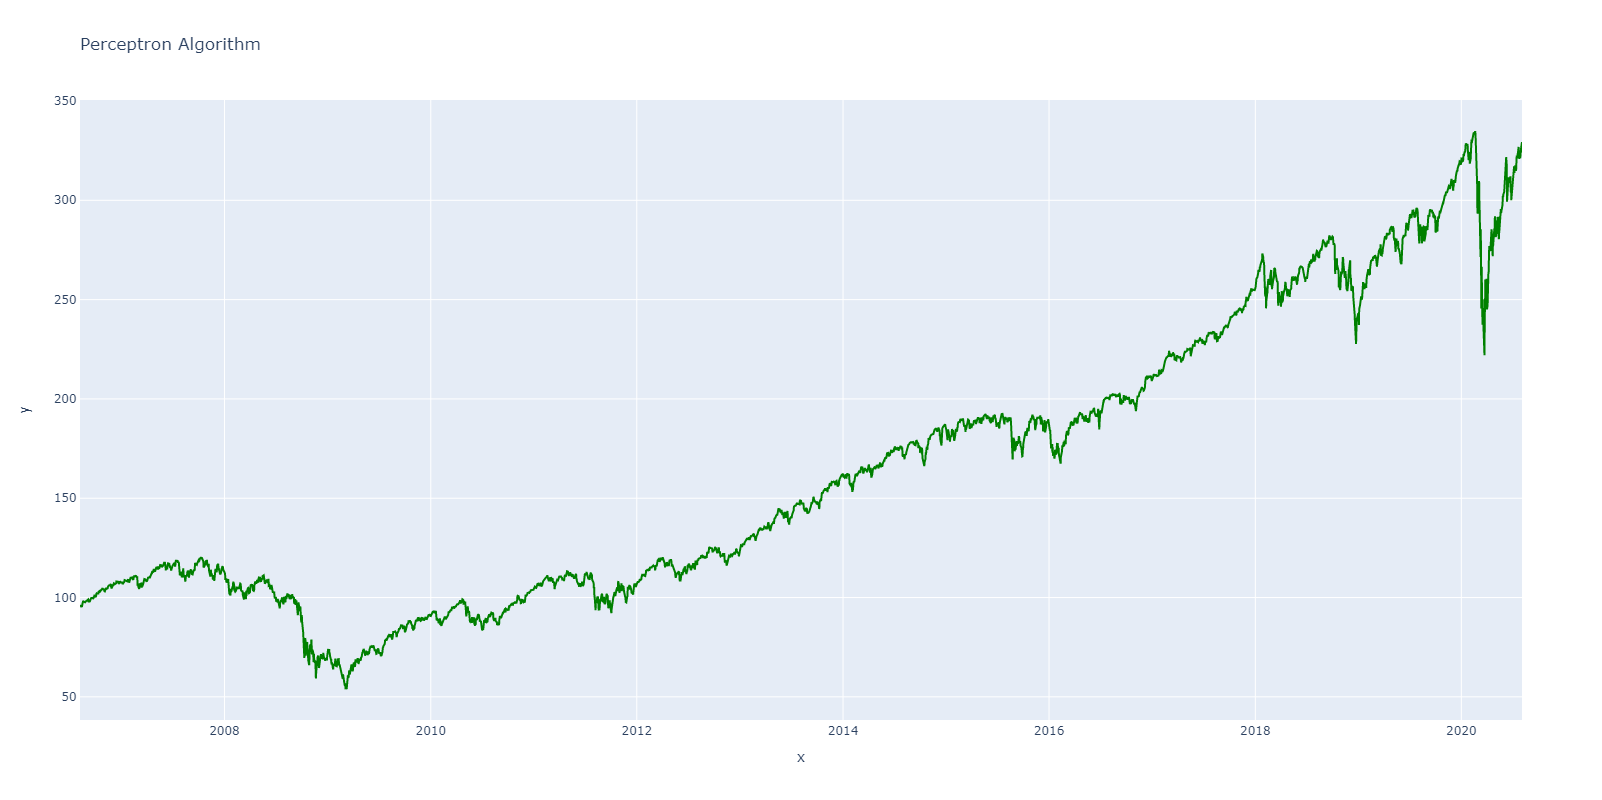

In [407]:
from plotly.offline import init_notebook_mode, iplot, plot
import chart_studio.plotly as py
import plotly.graph_objs as go
trace1 =go.Scatter(
                    x = inx_price_data.index,
                    y = inx_price_data.spy,
                    mode = "lines",
                    name = "Green",
                    marker = dict(color = 'green', size = 9),
                    text= 'Raw data')

layout = dict(title = 'Perceptron Algorithm',
              xaxis= dict(title= 'x',ticklen= 0,zerolinecolor='lightgray',zeroline= True),
              yaxis= dict(title= 'y',ticklen= 5,zerolinecolor='lightgray',zeroline= True),
              width = 800,height = 800
             )
data = [trace1]
fig = dict(data = data, layout = layout)
iplot(fig)

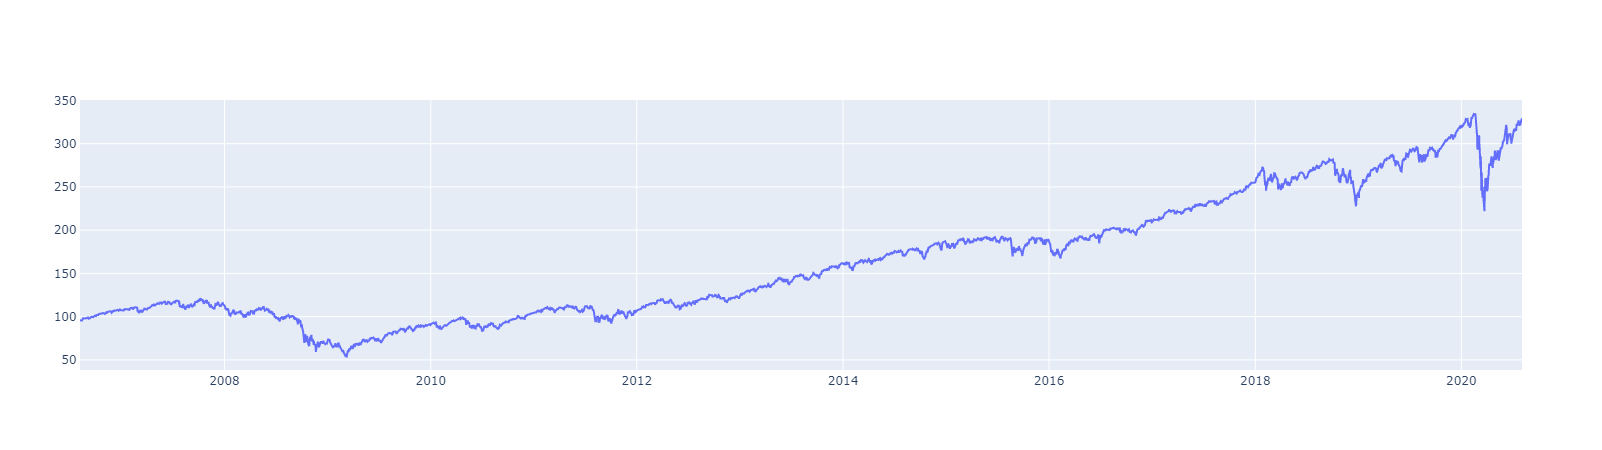

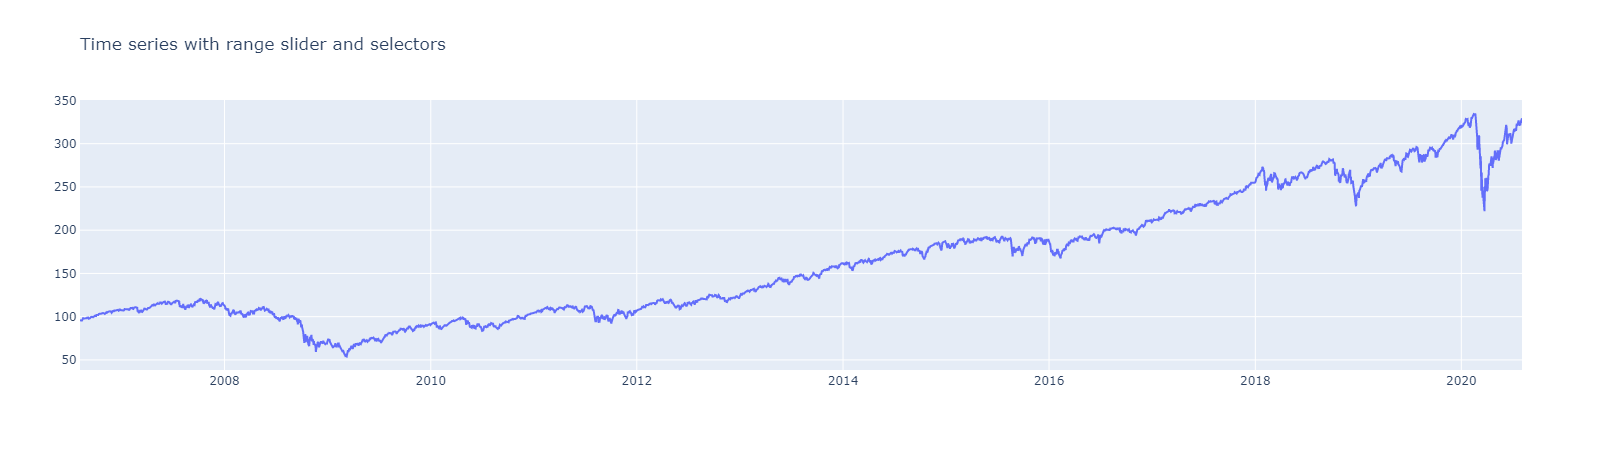

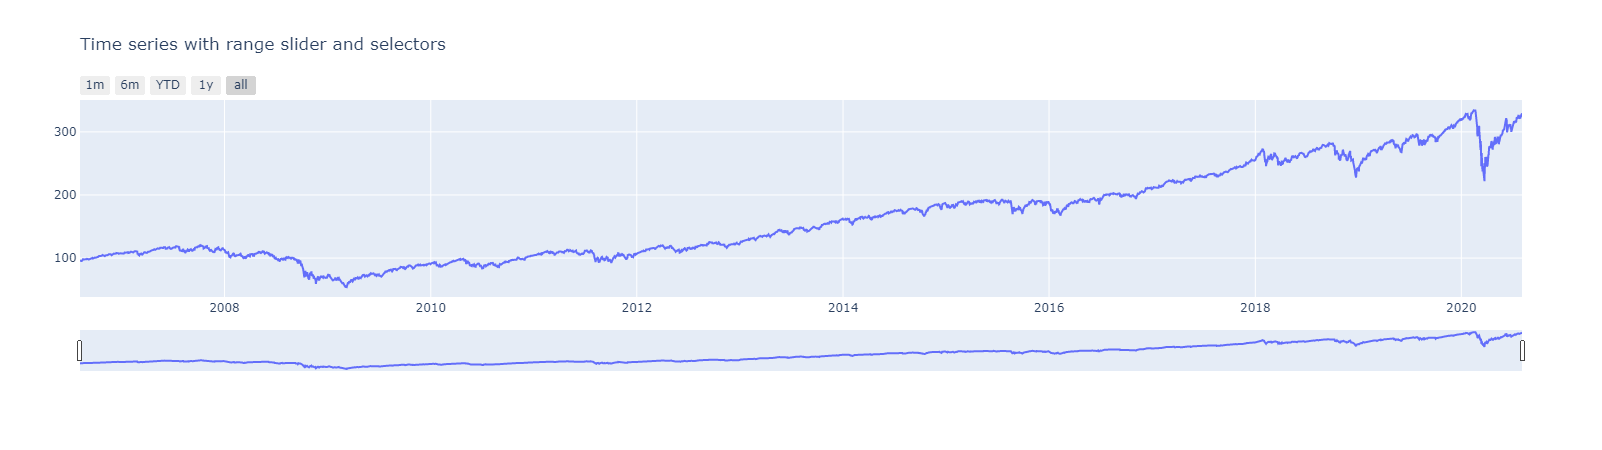

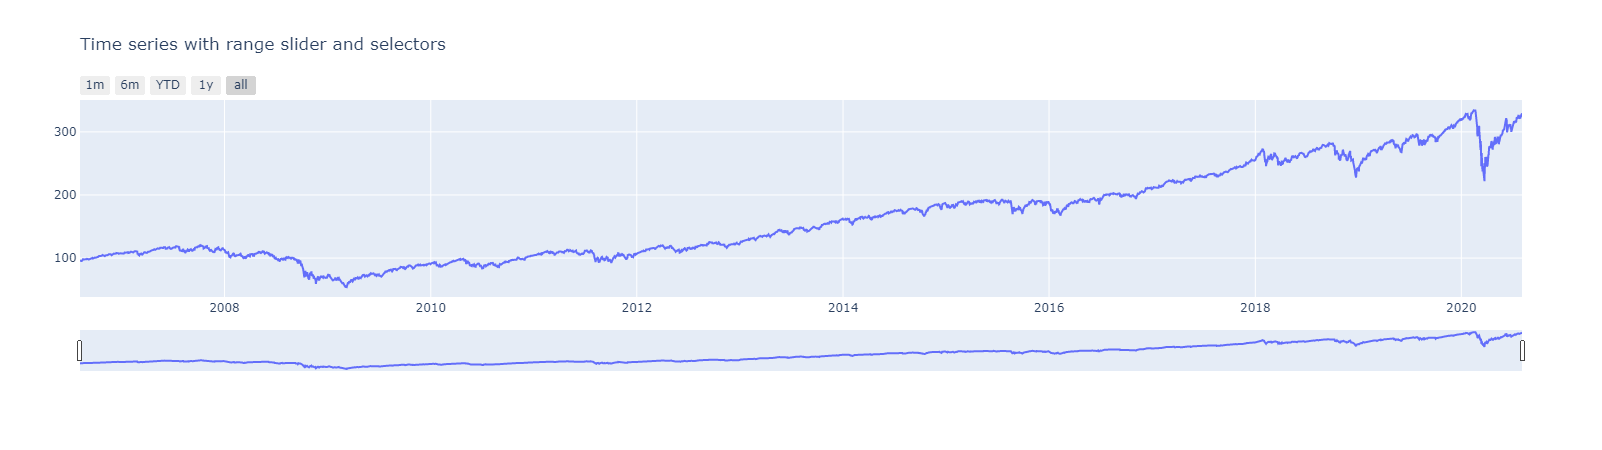

In [409]:
import plotly.graph_objects as go

import pandas as pd

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(inx_price_data.index), y=list(inx_price_data.spy)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()